Cleaned image saved to '/content/cleaned_gutters3.jpg'


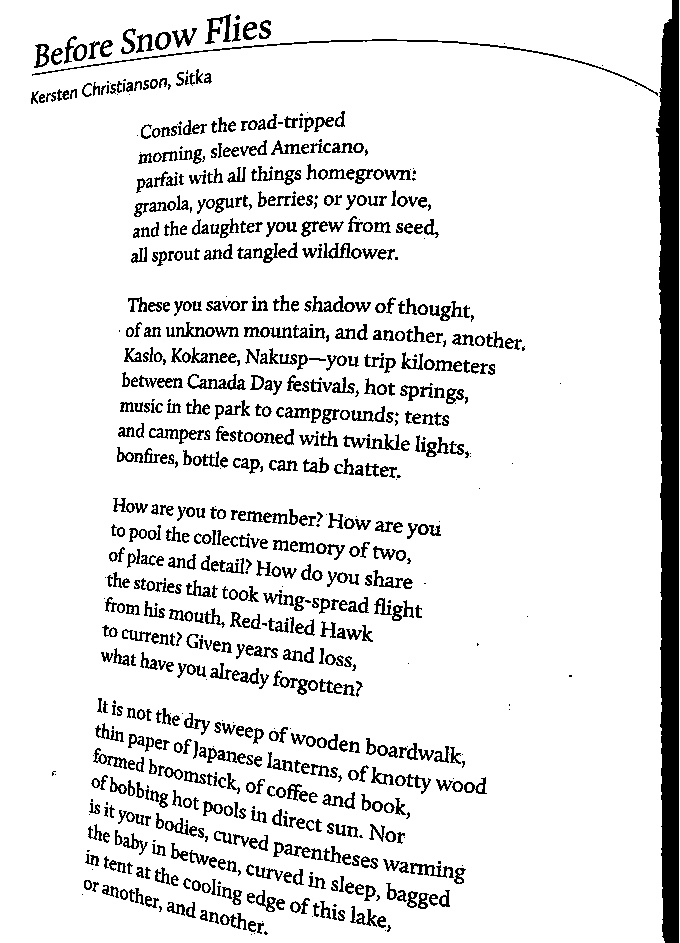

In [13]:
import cv2
import numpy as np
import urllib.request
from PIL import Image, ImageEnhance

def clean_gutters(input_image_path, output_image_path):
    # Load the input image
    image = cv2.imread(input_image_path)

    if image is None:
        print(f"Error: Failed to load image from '{input_image_path}'")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to remove shadows
    block_size = 51  # Adjust this parameter to change the block size for adaptive thresholding
    constant = 10  # Adjust this parameter to change the constant for adaptive thresholding
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, block_size, constant)

    # Enhance the image clarity and sharpness
    enhanced_image = enhance_image(binary)

    # Invert the colors
    inverted_image = cv2.bitwise_not(enhanced_image)

    # Save the cleaned image
    cv2.imwrite(output_image_path, inverted_image)
    print(f"Cleaned image saved to '{output_image_path}'")

def enhance_image(image):
    # Convert the image to PIL format
    pil_image = Image.fromarray(image)

    # Enhance the image using various techniques
    enhancer = ImageEnhance.Contrast(pil_image)
    enhanced_image = enhancer.enhance(3.0)  # Adjust the enhancement factor as needed

    return np.array(enhanced_image)

# Direct download link to the image file
file_url = 'https://drive.google.com/uc?id=1TEWcc_9-_8_yf2nJ9CDm6kAFU2oAyWv5'

# Output file path for the cleaned image
output_image_path = '/content/cleaned_gutters3.jpg'

# Download the image
urllib.request.urlretrieve(file_url, output_image_path)

# Clean the gutters
clean_gutters(output_image_path, output_image_path)

# Display the saved image
image = Image.open(output_image_path)
image.show()
